# Анализ расходов на рекламные источники мобильного приложения #

**Цель исследования**: оптимизировать расходы на рекламу.
<br>

**Задачи исследования**:
- выявить каналы для дальнейших инвестиций
- выявить каналы, от которых нужно отказаться.
<br>

**Гипотезы**:
1. Время завершения уровня различается в зависимости способа прохождения:  через реализацию проекта, через победу над первым игроком (Н0 - время завершения уровня не различается от способа прохождения уровня, H1 - время завершения уровня различается от способа прохождения уровня).
2. Завершение уровня зависит от источника привлечения (Н0 - время завершения уровня игроков, пришедших с yandex_direct, не различается от времени, привлеченных каналом youtube_channel_reklama, H1 - время завершения уровня игроков, пришедших с yandex_direct, различается от времени, привлеченных каналом youtube_channel_reklama ).

<br>

В ходе анализа будут использоваться следующие базы данных:
<br> датасет **game_actions.csv**:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

<br> датасет **ad_costs.csv**:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

<br> датасет **user_source.csv**:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение
<br>

**Ход исследования**:
- *Знакомство с данными* (выгрузка, общий анализ)
<br>

- *Предобработка данных*
    - Приведение названий столбцов к необходимому стилю.
    - Проверка на соответствие типов данных.
    - Поиск и обработка пропущенных значений.
    - Проверка на полные и неявные дубликаты.
    - Добавление новых необходимых для анализа столбцов (пользователи по  типу стратегии, время завершения уровня).
<br>


- *Исследовательский анализ данных*
    - Построить гистограммы по различным столбцам (например, распределение по типам событий, распределение по типам зданий,  распределение количества построенных объектов и т.д.).
    - Определить дату первого и последнего событий.
    - Построить график по медианному распределению количества построенных объектов по источникам.
    - Построить диаграмму, отображающую количество событий по периодам.
    - Построить гистограмму, отображающую количество пользователей, пришедших из разных источников.
    - Построить распределение количества построенных зданий по источникам.
<br>


- *Маркетинг*
    - Построить таблицу по стоимости кликов и источников.
    - Посчитать расходы  на клики по рекламным источникам.
    - Посчитать CAC.
<br>



- *Проверка статистических гипотез (1, 2)*
<br>

- *Общие выводы и рекомендации*
- *Подготовка презентации*


**Презентация**: https://disk.yandex.ru/i/A5JqndbdapWBEg

**Дашборд**: https://public.tableau.com/app/profile/galiya7574/viz/_16783822690210/sheet2?publish=yes

## 1. Знакомство с данными (выгрузка, общий анализ) ##

In [66]:
!pip install pandas==1.4.0

In [67]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from time import strftime
import scipy.stats as st
import math as mth
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

Загрузим данные, которые понадобятся для анализа, проведем общий анализ данных, применив методы head(), info().

In [68]:
try:
    path='/Users/Рафаэль/Desktop/python/Финальный проект/базы/'
    costs = pd.read_csv(path+'ad_costs.csv')
except:
    costs = pd.read_csv('/datasets/ad_costs.csv')
display(costs.head(5))
costs.info()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [69]:
try:
    path='/Users/Рафаэль/Desktop/python/Финальный проект/базы/'
    df = pd.read_csv(path+'game_actions.csv')
except:
    df = pd.read_csv('/datasets/game_actions.csv')
display(df.head(5))
df.info()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [70]:
try:
    path='/Users/Рафаэль/Desktop/python/Финальный проект/базы/'
    source = pd.read_csv(path+'user_source.csv')
except:
    source = pd.read_csv('/datasets/user_source.csv')
display(source.head(5))
source.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Общий анализ данных показал, что в датафрейме с расходами `costs` - 28 строк и 3 столбца, в датафрейме с поведением игроков `df` - 135640  и 5, в датафрейме с источниками `source` - 13576  и 2. 
<br>

Названия столбцов во всех датафреймах корректные. Пропуски наблюдаются только в `df`. 
<br>

Типы данных необходимо изменить в столбцах day (`costs`) и event_datetime (`df`) с object на date.

## 2. Предобработка данных ##

**Приведем типы данных в соответствующие корректные типы.**

In [71]:
costs['day'] =  pd.to_datetime(costs['day'])
df['event_datetime'] =  pd.to_datetime(df['event_datetime'])

In [72]:
# проверка
costs['day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28 entries, 0 to 27
Series name: day
Non-Null Count  Dtype         
--------------  -----         
28 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 352.0 bytes


In [73]:
df['event_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 135640 entries, 0 to 135639
Series name: event_datetime
Non-Null Count   Dtype         
--------------   -----         
135640 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


**Проведем проверку на пропущенные значения.**

In [74]:
# проверим датафрейм на пропущенные значения методом isna() и sum().
df.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [75]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
event_datetime,0.000000
event,0.000000
building_type,6.000000
user_id,0.000000
project_type,99.000000


В датафрейме `df` есть пропущенные значения в двух столбцах с типами зданий (6%) и типами проекта (99%). Данные пропуски  являются механическими (вытекают из логики игры), поэтому они не требует обработки. В целом 6% пропусков можно считать допустимым, не сильно влияющим на данные, тогда как 99% пропусков следует пояснить.

Проверим произошедшие события в момент, когда постройки отсутствовали, а также "правильность" (полноту) записей (есть ли записи без типа строений и есть ли записи проектов без типа проектов).

Проверим произошедшие события в момент, когда постройки отсутствовали.

In [76]:
df[df['building_type'].isna()]['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

Пропущеные значения связаны с тем, что игрок завершил игру. Далее проверим полноту записей по событию building. п

In [77]:
df.query('event=="building"').shape[0]

127957

In [78]:
df.query('event=="building"').isna().sum().sort_values(ascending=False)

project_type      127957
event_datetime         0
event                  0
building_type          0
user_id                0
dtype: int64

Таким образом, в записях о строениях есть пропущенные значения только в столбце типов проектов, что исходит из логики игры. Далее также проверим, записи о проектах.

In [79]:
df.query('event=="project"').shape[0]

1866

In [80]:
df.query('event=="project"').isna().sum().sort_values(ascending=False)

building_type     1866
event_datetime       0
event                0
user_id              0
project_type         0
dtype: int64

Здесь также все в порядке, поэтому можно сделать вывод о том, что "плохих" (не логических) пропусков в данных нет.

In [81]:
# ниже то, что было

Рассчитаем количество событий не проектов, их число должно быть равно числу пропусков в project_type. 

In [82]:
df.query('event == "building"| event == "finished_stage_1"').shape[0]

133774

Количество пропусков а столбце с типом проектов совпадает с числом "непроектов", значит, наше предположение верно.

Проверим датафрейм на дубликаты.

In [83]:
df.duplicated().sum()

1

Удалим данный дубликат.

In [84]:
df = df.drop_duplicates()

In [85]:
# проверка
df.duplicated().sum()

0

In [86]:
source.duplicated().sum()

0

In [87]:
costs.duplicated().sum()

0

В исходных данных отсутствуют полные дубликаты.

Посмотрим на названия источников дохода в датафреймах `costs` и `source`.

In [88]:
source['source'].value_counts()

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

In [89]:
costs['source'].value_counts()

facebook_ads               7
instagram_new_adverts      7
yandex_direct              7
youtube_channel_reklama    7
Name: source, dtype: int64

Названия источников полностью совпадают в обоих датафреймах.

Добавим новую таблицу time для получения столбца **"время завершения игры"** (время в игре) для каждого игрока, сначала высчитаем время первого и последнего событий, а после посчитаем, сколько времени прошло между этими событиями (tig - time in game), в целом, в днях, часах.

In [90]:
time = (df.groupby('user_id').agg({'event_datetime': 'min'}).rename(columns={'event_datetime': 'first'}))
time['last']= (df.groupby('user_id').agg({'event_datetime': 'max'}).rename(columns={'event_datetime': 'last'}))
time['tig'] =(time['last']-time['first']).dt.round('H')
time['tig_h'] = time['tig']/ np.timedelta64(1, 'h')
time['days'] = (time['tig'].dt.total_seconds()/(24*60*60)).round(1)
time['date'] = time['first'].dt.date
# объединим df с time для дальнейших подсчетов
df = df.merge(time, how='left', on='user_id')
df

,event_datetime,event,building_type,user_id,project_type,first,last,tig,tig_h,days,date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:00:00,164.0,6.8,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04 00:00:03,2020-05-15 05:29:13,11 days 05:00:00,269.0,11.2,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04 00:00:16,2020-05-16 11:51:58,12 days 12:00:00,300.0,12.5,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04 00:00:16,2020-05-12 04:29:54,8 days 04:00:00,196.0,8.2,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04 00:00:35,2020-05-11 14:18:05,7 days 14:00:00,182.0,7.6,2020-05-04
...,...,...,...,...,...,...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-05-06 02:56:25,2020-06-05 12:32:49,30 days 10:00:00,730.0,30.4,2020-05-06
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-07 07:28:50,2020-06-05 02:25:12,28 days 19:00:00,691.0,28.8,2020-05-07
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-05-07 06:56:28,2020-06-05 08:57:52,29 days 02:00:00,698.0,29.1,2020-05-07
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-05-07 05:43:45,2020-06-05 12:12:27,29 days 06:00:00,702.0,29.2,2020-05-07


Добавим новый столбец с типами игроков по стратегиям.

Для начала выделим **категории игроков**, которые прошли уровень, посредством проекта и победы над другими игроками, поскольку у нас в базе нет непосредственной записи о тех, кто завершил уровень с помощью победы, выделим их с помощью их id. Строителей (pve) можно выделить срезом, где тип события - project, либо тип проекта - satellite_orbital_assembly.

Посчитаем число строителей (pve - player  versus environment).

In [91]:
pve = df.query('project_type == "satellite_orbital_assembly"')['user_id']
pve.shape[0]

1866

Заменим пропуски в типе проектов на pvp (player versus player), выделив пользователей, завершивших первый уровень, исключив пользователей с проектом (pve).

In [92]:
pvp = df.query('event == "finished_stage_1" and user_id not in @pve') ['user_id']
pvp.shape[0]

3951

Добавим отдельный столбец в датафрейм df с типами игроков, для этого предварительно создадим условия и названия типов.

In [93]:
conditions = [(df['user_id'].isin(pve)), (df['user_id'].isin(pvp)), (~df['user_id'].isin(pve)) & (~df['user_id'].isin(pvp))]

In [94]:
values = ['pve', 'pvp', 'not_finished']

In [95]:
df['player_type'] = np.select(conditions, values)

In [96]:
# проверка
df.groupby('player_type')['user_id'].nunique()

player_type
not_finished    7759
pve             1866
pvp             3951
Name: user_id, dtype: int64

Посмотрим на графике процентное соотношение типов игроков.

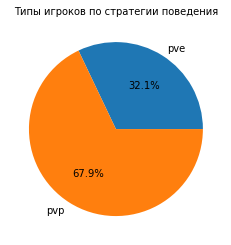

In [97]:
sizes = [1866, 3951]
labels= 'pve', 'pvp'
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Типы игроков по стратегии поведения', fontsize=10)
warnings.filterwarnings('ignore')

Таким образом, среди завершивших первый уровень, 32% игроков завершили его с помощью проекта (pve) и порядка 68% - с помощью победы над соперником (pvp).

**Выводы**: 
<br> в исходных данных присутствуют пропущенные значения, появились механически из-за логики игры, отсутствуют полные дубликаты. В ходе предобработки был скорректирован тип данных столбцов, добавлен столбец player_type с типами игроков по стратегии и столбец tig (в таблице time) с временем завершения уровня. В целом можно сделать вывод, что данные достаточно качественные.

## 3. Исследовательский анализ данных ##

Посмотрим распределение событий и типов зданий.

In [98]:
df['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [99]:
df['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

Самым популярным событием являетс постройка здания и наиболее распространенным типом зданий является spaceport, далее assembly shop и много меньше research_center.

Определим дату первого и последнего событий игры.

In [100]:
df['event_datetime'].agg(['min', 'max'])

min   2020-05-04 00:00:01
max   2020-06-05 12:32:49
Name: event_datetime, dtype: datetime64[ns]

Период исследования событий с 4 мая по 5 июня 2020 года (примерно 1 месяц).

Посмотрим распределение событий.

In [101]:
df['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Посмотрим даты затрат на рекламу.

In [102]:
costs['day'].agg(['min', 'max'])

min   2020-05-03
max   2020-05-09
Name: day, dtype: datetime64[ns]

Можно увидеть, что период оплаты рекламы (с 3 мая по 9 мая) на один день опережает период событий (когорта недельная с 4 мая по 10 мая), что логично, так как приход игроков был после запуска рекламы.

Для удобства анализа соединим таблицы df и source.

In [103]:
df = df.merge(source, how = 'left', on = 'user_id')
df

,event_datetime,event,building_type,user_id,project_type,first,last,tig,tig_h,days,date,player_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04 00:00:01,2020-05-10 20:27:01,6 days 20:00:00,164.0,6.8,2020-05-04,not_finished,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04 00:00:03,2020-05-15 05:29:13,11 days 05:00:00,269.0,11.2,2020-05-04,pve,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04 00:00:16,2020-05-16 11:51:58,12 days 12:00:00,300.0,12.5,2020-05-04,pvp,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04 00:00:16,2020-05-12 04:29:54,8 days 04:00:00,196.0,8.2,2020-05-04,not_finished,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04 00:00:35,2020-05-11 14:18:05,7 days 14:00:00,182.0,7.6,2020-05-04,pvp,yandex_direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-05-06 02:56:25,2020-06-05 12:32:49,30 days 10:00:00,730.0,30.4,2020-05-06,pvp,instagram_new_adverts
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-05-07 07:28:50,2020-06-05 02:25:12,28 days 19:00:00,691.0,28.8,2020-05-07,pvp,yandex_direct
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-05-07 06:56:28,2020-06-05 08:57:52,29 days 02:00:00,698.0,29.1,2020-05-07,not_finished,youtube_channel_reklama
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-05-07 05:43:45,2020-06-05 12:12:27,29 days 06:00:00,702.0,29.2,2020-05-07,pvp,facebook_ads


Посмотрим в целом на доли игроков по источникам.

In [104]:
x= (df.groupby('source')['user_id'].nunique().sort_values(ascending = False) / df['user_id'].nunique() * 100).round(1).reset_index(name = '% привлеченных игроков')
x

,source,% привлеченных игроков
0,yandex_direct,35.5
1,instagram_new_adverts,24.7
2,facebook_ads,20.1
3,youtube_channel_reklama,19.8


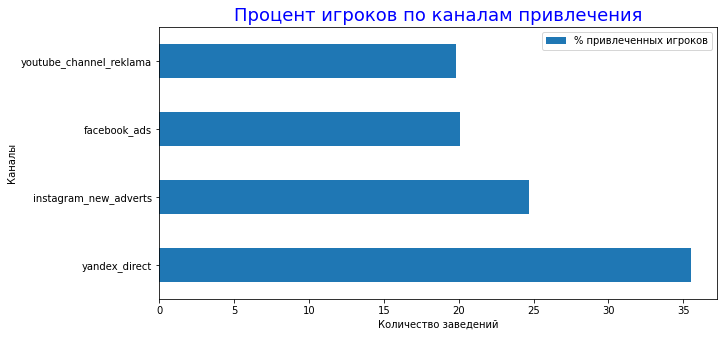

In [105]:
x.plot.barh(figsize=(10,5), x='source' )
plt.title('Процент игроков по каналам привлечения', fontsize=18, color='blue')
plt.ylabel('Каналы')
plt.xlabel('Количество заведений')
warnings.filterwarnings('ignore')

Самая большая доля игроков была привлечена с помощью канала yandex_direct (35,5%), на втором месте instagram_new_adverts (24,7%) и два остальных канала имеют примерно одинаковую долю в 20% (facebook_ads и youtube_channel_reklama).

 **Построим график по распределению количества построенных объектов по источникам.**

In [106]:
build_cnt= df.groupby(by='source').agg({'building_type':'count'}).sort_values(by='building_type', ascending=False).reset_index()
build_cnt.columns = ['source', 'count']
build_cnt

,source,count
0,yandex_direct,45032
1,instagram_new_adverts,31815
2,facebook_ads,26131
3,youtube_channel_reklama,24978


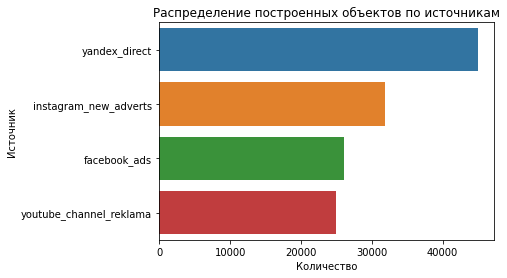

In [107]:
# Рисуем график распределения количества построенных объектов по источникам
plt.title('Распределение построенных объектов по источникам') 
sns.barplot(x='count', y='source', data=build_cnt).set(ylabel='Источник', xlabel='Количество')
plt.show()

Количество построенных зданий, достаточно важный показатель доходности каналов, т.к., чем больше объектов строи игрок, тем больше приносит денег компании. Как видно из графика, наибольшее количество объектов было построено игроками, привлеченными yandex_direct (порядка 45 тыс.), меньшее количество - источником instagram_new_adverts (около 32 тыс) и на третьем месте - facebook_ads (26 тыс.) и youtube_channel_reklama (25 тыс.).

Также посмотрим, какой тип игроков строит зданий больше, чтобы понять, каких игроков нужно больше привлекать.

In [108]:
df.pivot_table(index = 'source', columns= 'player_type', 
            values = 'building_type', 
            aggfunc =  'count').rename(columns={'building_type':'всего'}).reset_index()

player_type,source,not_finished,pve,pvp
0,facebook_ads,14028,4946,7157
1,instagram_new_adverts,16437,6072,9306
2,yandex_direct,23891,7809,13332
3,youtube_channel_reklama,12814,4774,7390


Как видно из таблицы, больше всего зданий построили, не завершившие проект, по всем источникам, также воины строят больше, чем строители. В целом же по всем каналам наблюдается сходная картина.

Для наглядности построим график.

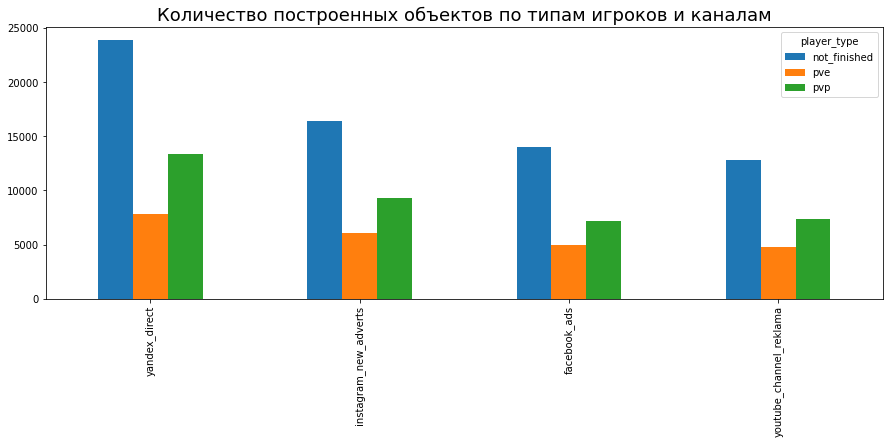

In [109]:
builders = df.pivot_table(index = 'player_type', columns= 'source', 
            values = 'building_type', 
            aggfunc =  'count')
sorting = builders.sum().sort_values(ascending=False)
builders[sorting.index].T.plot.bar( figsize=(15,5))
plt.title('Количество построенных объектов по типам игроков и каналам', fontsize=18)
plt.xlabel('') 
plt.ylabel('')
warnings.filterwarnings('ignore')

 <div class="alert alert-info">  Посчитаем среднее количество зданий по источникам.

Посчитаем количество построенных зданий на игрока.

In [110]:
cnt=df.query('event=="building"').groupby('user_id').agg({'event':'count'}).reset_index()
cnt

,user_id,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8
4,002f508f-67b6-479f-814b-b05f00d4e995,12
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7


In [111]:
cnt = cnt.merge(source, how = 'left', on = 'user_id')
cnt= cnt.rename(columns={'event':'cnt_build'})
cnt

,user_id,cnt_build,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,12,facebook_ads
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,instagram_new_adverts


Посчитаем медианное значение построенных зданий по источникам.

In [112]:
cnt.groupby('source').agg({'cnt_build':'median'}) 

,cnt_build
source,
facebook_ads,10.0
instagram_new_adverts,10.0
yandex_direct,10.0
youtube_channel_reklama,10.0


Text(0, 0.5, '')

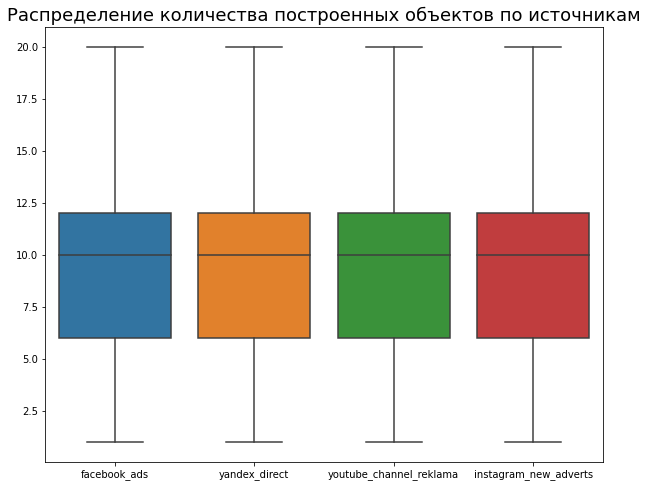

In [113]:
# построим диграмму размаха
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='source', y='cnt_build', data=cnt) 
ax.set_title('Распределение количества построенных объектов по источникам', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

Согласно графику, медианное значение не различается по источникам, поэтому, видимо, количество построенных объектов каждым игроком не зависит от источника привлечения.

Посмотрим соотношение типов игроков (pve (строители), pvp (войны), not_finished (не завершившие уровень) по каналам привлечения. 

In [114]:
(df.groupby(['source', 'player_type'])['user_id'].nunique()/ df.groupby('source')['user_id'].nunique() * 100) 

source                   player_type 
facebook_ads             not_finished    57.813646
                         pve             14.343360
                         pvp             27.842993
instagram_new_adverts    not_finished    56.199582
                         pve             14.221691
                         pvp             29.578727
yandex_direct            not_finished    57.608470
                         pve             12.871082
                         pvp             29.520448
youtube_channel_reklama  not_finished    56.850335
                         pve             14.110201
                         pvp             29.039464
Name: user_id, dtype: float64

В данной таблице необходимо обратить внимание на те источники, которые привлекли наибольшее количество игроков, не прошедших уровень, однако, у всех источников процент таких участников примерно одинаковый не более 60% (порядка 56-57%).

Посмотрим соотношение только по типам игроков, завершивших уровень (pve, pvp) по каналам привлечения. Для начала пропишем условие, при котором можно считать, что игрок завершил первый уровень, это условие понадобится в дальнейшем анализе.

In [115]:
finish_conds = (df['player_type'] == "pve") | (df['player_type'] == "pvp")

In [116]:
(df[finish_conds].groupby(['source', 'player_type'])['user_id'].nunique()/ df[finish_conds].groupby('source')['user_id'].nunique() * 100) 

source                   player_type
facebook_ads             pve            34.000000
                         pvp            66.000000
instagram_new_adverts    pve            32.469304
                         pvp            67.530696
yandex_direct            pve            30.362390
                         pvp            69.637610
youtube_channel_reklama  pve            32.700604
                         pvp            67.299396
Name: user_id, dtype: float64

По соотношению воителей и строителей источники также сильно не разнятся, тем не менее, можно отметить, что самое большое количество воителей у yandex_direct (69%) и самое меньшее facebook_ads (67%). Если по логике игры воители приносят больше доходов приложению, тогда yandex_direct как канал по привлечению игроков выглядит наиболее выигрышно. В целом игроков воителей значимо больше - примерное соотношение: 30 на 70. 

Для наглядности построим график по количеству разных типов игроков по каналам.

In [117]:
players = df.pivot_table(index = 'source', columns ='player_type', values='user_id',  aggfunc='count')
players


player_type,not_finished,pve,pvp
source,,,
facebook_ads,14028,5728,7916
instagram_new_adverts,16437,7024,10296
yandex_direct,23891,9049,14754
youtube_channel_reklama,12814,5532,8170


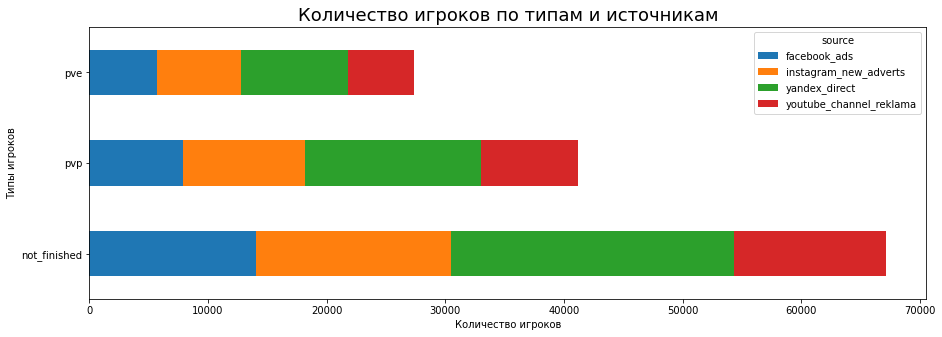

In [118]:
sorting = players.sum().sort_values(ascending=False)
players[sorting.index].T.plot.barh(stacked=True, figsize=(15,5))
plt.title('Количество игроков по типам и источникам', fontsize=18)
plt.xlabel('Количество игроков') 
plt.ylabel('Типы игроков')
warnings.filterwarnings('ignore')

По графику можно видеть, что не завершивших больше всего по типу игроков.

Посмотрим на **время, которое затрачивается на игру**, и как оно разнится в поведении игроков по каналам.

In [119]:
time['tig_h'].describe()

count    13576.000000
mean       256.220021
std        104.413001
min          0.000000
25%        185.000000
50%        253.000000
75%        319.250000
max        742.000000
Name: tig_h, dtype: float64

In [120]:
time['days'].describe()

count    13576.000000
mean        10.675840
std          4.350855
min          0.000000
25%          7.700000
50%         10.500000
75%         13.300000
max         30.900000
Name: days, dtype: float64

Среднее время, проводимое в игре, составляет 10 дней 16 часов (256 часов, 10,6 дней). Максимальное количество дней за игрой - 30 дней (742 часа).

Посмотрим на распределение времени, затраченного на игру.

In [ ]:
sns.distplot(time['tig_h'])
plt.title('Распределение времени в игре', fontsize=15)
plt.xlabel('Количество часов') 
plt.ylabel('Частота')
warnings.filterwarnings('ignore')
plt.show()

Самое большое количество игроков провели в игре примерно от 200 до 400 часов.
  

Посмотрим среднее значение прохождения уровня у завершивших уровень в целом, не завершивших, строителей и воинов.

In [ ]:
df[finish_conds]['tig_h'].mean()

In [ ]:
df[~finish_conds]['tig_h'].mean()

In [ ]:
df.query('player_type== "pve"')['tig_h'].mean()

In [ ]:
df.query('player_type== "pvp"')['tig_h'].mean()

Среднее количество времени в игре отличается по стратегии игрока и факта завершения уровня: у строителей (pve) это время больше на порядка 44 часа, и время в игре больше у, завершивших уровень, примерно на 32 часа. Гипотеза о связи стратегии игры с временем будет проверена позже. В целом же можно сделать вывод, что более выигрышно привлекать в игру тех, кто проходит первый уровень и выбирает стратегию строителя. И, значит, нужно обратить внимание отделу маркетинга на те иточники, которые привлекают таких игроков.

### **Маркетинг**
   



Проанализируем **таблицу с расходами на источники**.

Посмотрим на общую стоимость кликов для каждого источника за весь период.


In [ ]:
costs_pl = costs.groupby('source').agg({'cost': 'sum'}).reset_index().merge(df.groupby('source')['user_id'].nunique().reset_index(), on = 'source')
costs_pl

Самый дорогой источник рекламы - yandex_direct (2233), самый дешевый - youtube_channel_reklama, такие источники facebook_ads и instagram_new_adverts имеют примерно одинаковые значения (219 и 2160).

<br> Рассчитаем **CAC** (стоимость привлечения клиентов).

In [ ]:
costs_pl['cac'] = (costs_pl['cost'] / costs_pl['user_id']).round(2)
costs_pl

In [ ]:
ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x = 'source', y = 'cac', data=costs_pl)
ax.set_title('CAC по источникам', fontsize=15)
ax.set_xlabel ('источник', fontsize=10)
ax.set_ylabel ('CAC', fontsize=10)
plt.xticks(rotation=15)
warnings.filterwarnings('ignore')

Самый большой CAC у facebook_ads (0,79), чуть меньше у instagram_new_adverts (0,65) и самый низкий - у youtube_channel_reklama. Таким образом, самым дорогим источником привлечения игроков является facebook_ads, хотя он не привлекает самое большое количество игроков.

## **Проверка гипотез**

**Первая гипотеза**
<br>
Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта и  победу над первым игроком
- время завершения уровня не различается от способа прохождения уровня (нулевая гипотеза H0)
- время завершения уровня различается от способа прохождения уровня (альтернативная гипотеза H1).

In [ ]:
# используем метод scipy.stats.ttest_ind()
alpha = .05
results = st.ttest_ind(
   df[df.player_type == 'pve'].groupby('user_id')['tig_h'].max(), 
    df[df.player_type == 'pvp'].groupby('user_id')['tig_h'].max(), 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Проверка гипотезы показала, что время завершения первого уровня зависит от способа прохождения уровня.

**Вторая гипотеза**
<br>
Время завершения уровня различается от рекламного канала: 
- время завершения уровня игроков, пришедших с yandex_direct, не различается от времени, привлеченных  каналом youtube_channel_reklama (нулевая гипотеза H0)
- время завершения уровня игроков, пришедших с yandex_direct, различается от времени, привлеченных  каналом youtube_channel_reklama (альтернативная гипотеза H1).

In [ ]:
alpha = .05
results = st.ttest_ind(
   df[df.source == 'yandex_direct'].groupby('user_id')['tig_h'].max(), 
    df[df.source == 'youtube_channel_reklama'].groupby('user_id')['tig_h'].max(), 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Таким образом, время завершения уровня, пришедших с каналов yandex_direct и youtube_channel_reklama, различается.

## **Общие выводы и рекомендации**

Мы проанализировали данные о рекламных источниках мобильного приложения, в ходе которого мы провели предобработку данных, в ходе которой были обнаружены пропущенные значения, которые появились механически из-за логики игры.  Также были добавлены новые столбцы, необходимые для исследования и скорректированы типы данных. В целом же анализ показал, что представленные данные достаточно качественные. В результате анализа были выявлены особенности поведения игроков по каналам.
<br>

*Выводы:*
- Самая большая доля игроков была привлечена с помощью канала yandex_direct (35,5%), на втором месте instagram_new_adverts (24,7%) и два остальных канала имеют примерно одинаковую долю в 20% (facebook_ads и youtube_channel_reklama).
- Количество построенных объектов каждым игроком не зависит от источника привлечения: медианное значение не различается (10 объектов).

<br>

*Типы игроков по стратегиям*
- По типам стратегии поведения игроки распределены следующим образом: порядка 68% завершили уровень с помощью победы над соперником и 32% - посредством проекта. Вместе с тем, доля не завершивших первый уровень больше, чем завершивших уровень (57 и 43%).
- По всем источникам доля игроков, не прошедших уровень, примерно одинаковая не более 60% (порядка 56-57%).
- По соотношению воителей и строителей источники также сильно не разнятся, тем не менее, можно отметить, что самое большое количество воителей у yandex_direct (69%) и самое меньшее facebook_ads (67%). В целом игроков воителей значимо больше - примерное соотношение: 30 на 70.
<br>

*Времени, которое тратится на завершение игры*
- Среднее время, проводимое в игре, составляет 10 дней 16 часов (256 часов, 10,6 дней), максимальное количество дней за игрой - 30 дней (742 часа).
- Наибольшая часть игроков провели в игре примерно от 200 до 400 часов.
- Среднее количество времени в игре отличается по стратегии игрока и факта завершения уровня: у строителей (pve) это время больше на порядка 44 часа, и время в игре больше у, завершивших уровень, примерно на 32 часа. 
<br>

*Маркетинг*
- По стоимости кликов для каждого источника за весь период, самым дорогим является - yandex_direct (2233), самым дешевым - youtube_channel_reklama, такие источники facebook_ads и instagram_new_adverts имеют примерно одинаковые значения (219 и 2160).
- Самый большой CAC у facebook_ads (0,79), чуть меньше у instagram_new_adverts (0,65) и самый низкий - у youtube_channel_reklama. Таким образом, самым дорогим источником привлечения игроков по САС является facebook_ads, хотя он не привлекает самое большое количество игроков.
<br>

*Проверка гипотез*
Проверка гипотезы показала, что время завершения первого уровня зависит от способа прохождения уровня.
Таким образом, время завершения уровня, пришедших с каналов yandex_direct и youtube_channel_reklama, различается.


**Рекомендации**
Согласно проведенному анализу, наиболее перспективный канал привлечения yandex_direct, поскольку он в целом привлекает самое большее количество игроков. Кроме того, у данного канала второй самый низкий CAC, то есть он не является очень дорогим источником привлечения игроков.
<br>

Вместе с тем, следует, вероятно, отказаться от такого источника, как facebook_ads, так как он мало привлекат пользователей и является самым дорогим по привлечению игроков (самый высокий CAC).

<br>
В качестве второго перспективного канала для привлечения игроков, можно обозначить youtube_channel_reklama, поскольку он привлекает примерно такое же количество игроков, что и facebook_ads, но имеет самый низкий CAC, то есть является самым дешевым каналом.